# Setup Libraries

In [2]:
import requests
import os
import warnings
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Download SPEI Data

This section downloads the "Global 01-month 1901-2023 SPEI" dataset (spei01.nc) from the CSIC Digital Repository. The dataset contains the Standardized Precipitation Evapotranspiration Index (SPEI) values, a key climate index used to measure drought severity, covering the period from 1901 to 2023 at a 1-month temporal resolution. The data is provided in NetCDF (.nc) format, commonly used for storing multidimensional climate data.

The dataset can be found at: https://digital.csic.es/handle/10261/364137.

The file is downloaded and saved locally as 'spei01.nc'. Error handling is implemented to ensure that the download succeeds, and in case
of any issues (such as connection errors or incorrect URLs), informative error messages are shown.

Once the file is successfully downloaded, the basic structure of the dataset is printed, including dimensions, variables, and attributes. A small sample of data from each variable is displayed as well to give insight into the format and contents of the dataset.

In [6]:
url = 'https://digital.csic.es/bitstream/10261/364137/1/spei01.nc'
file_path = './spei01.nc'

# Download data with proper error handling
try:
    print(f"Downloading file from {url}...")
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Raises exception for HTTP error codes

    # Save the file
    with open(file_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)

    print(f"File successfully saved to {file_path}.")

    # Load the SPEI NetCDF file with error handling
    import xarray as xr

    # Suppress warnings that might be related to the encoding issues
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # Open the dataset with minimal decoding
        data = xr.open_dataset(file_path, decode_times=False, decode_coords=False)

    # Print basic information about the dataset structure
    print(f"\nDataset dimensions: {data.dims}")
    print(f"Dataset variables: {list(data.variables)}")
    print(f"Dataset attributes: {data.attrs}")

    # Print a small sample of actual data for each variable
    print("\n--- DATA SAMPLES ---")
    for var_name in data.variables:
        var = data[var_name]
        print(f"\nVariable: {var_name}")
        print(f"Attributes: {var.attrs}")

        # Try to print a small slice of the data
        try:
            # For multi-dimensional arrays, get first few elements
            if len(var.dims) > 0:
                # Get a small slice
                if len(var.dims) == 1:
                    sample = var.values[:5]
                elif len(var.dims) == 2:
                    sample = var.values[:5, :5]
                elif len(var.dims) >= 3:
                    sample = var.values[:5, :5, :5]

                print(f"Sample data: {sample}")
            else:
                # For scalar variables
                print(f"Value: {var.values}")
        except Exception as e:
            print(f"Could not print sample: {e}")

except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    import traceback
    traceback.print_exc()


File successfully saved to ./spei01.nc.

Dataset dimensions: FrozenMappingWarningOnValuesAccess({'lon': 720, 'lat': 360, 'time': 1476})
Dataset variables: ['lon', 'lat', 'time', 'spei', 'crs']
Dataset attributes: {'conventions': 'CF-1.11', 'title': 'Global 1-month SPEI, z-values, 0.5 degree', 'version': '2.10.0', 'id': './outputNcdf/spei01.nc', 'summary': 'Global dataset of the Standardized Precipitation-Evapotranspiration Index (SPEI) at the 1-month time scale. Using CRU TS 4.08 precipitation and potential evapotranspiration data', 'keywords': 'drought, climatology, SPEI, Standardized Precipitation-Evapotranspiration Index', 'institution': 'Consejo Superior de Investigaciones Cient\udcc3\udcadficas, CSIC', 'source': 'http://sac.csic.es/spei', 'creators': 'Santiago Beguer\udcc3\udcada <santiago.begueria@csic.es> and Sergio Vicente-Serrano <svicen@ipe.csic.es>', 'software': 'Created in R using the SPEI package (https://cran.r-project.org/web/packages/SPEI/;https://github.com/sbegueria/S

# Visualisation of SPEI Data

As the focus of the project is on drought forecasting in Australia, some visualisations are provided below for the SPEI index across Australia.

Data shape: (1476, 68, 84)
Latitudes: [-43.75 -43.25 -42.75 -42.25 -41.75 -41.25 -40.75 -40.25 -39.75 -39.25
 -38.75 -38.25 -37.75 -37.25 -36.75 -36.25 -35.75 -35.25 -34.75 -34.25
 -33.75 -33.25 -32.75 -32.25 -31.75 -31.25 -30.75 -30.25 -29.75 -29.25
 -28.75 -28.25 -27.75 -27.25 -26.75 -26.25 -25.75 -25.25 -24.75 -24.25
 -23.75 -23.25 -22.75 -22.25 -21.75 -21.25 -20.75 -20.25 -19.75 -19.25
 -18.75 -18.25 -17.75 -17.25 -16.75 -16.25 -15.75 -15.25 -14.75 -14.25
 -13.75 -13.25 -12.75 -12.25 -11.75 -11.25 -10.75 -10.25]
Longitudes: [112.25 112.75 113.25 113.75 114.25 114.75 115.25 115.75 116.25 116.75
 117.25 117.75 118.25 118.75 119.25 119.75 120.25 120.75 121.25 121.75
 122.25 122.75 123.25 123.75 124.25 124.75 125.25 125.75 126.25 126.75
 127.25 127.75 128.25 128.75 129.25 129.75 130.25 130.75 131.25 131.75
 132.25 132.75 133.25 133.75 134.25 134.75 135.25 135.75 136.25 136.75
 137.25 137.75 138.25 138.75 139.25 139.75 140.25 140.75 141.25 141.75
 142.25 142.75 143.25 143.75 144.25 144.

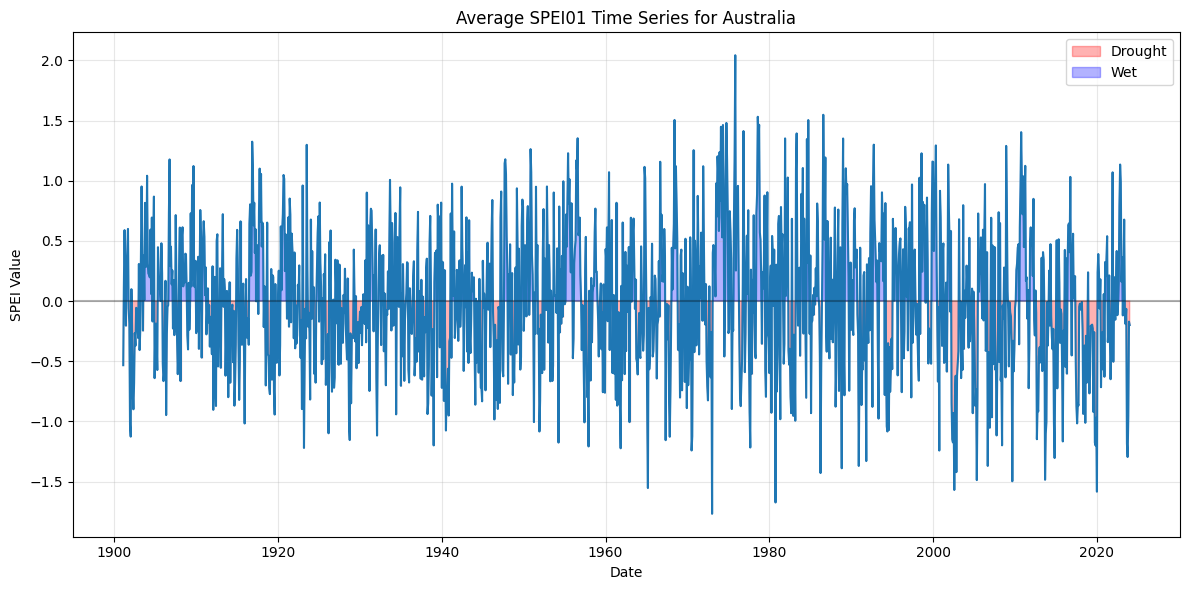

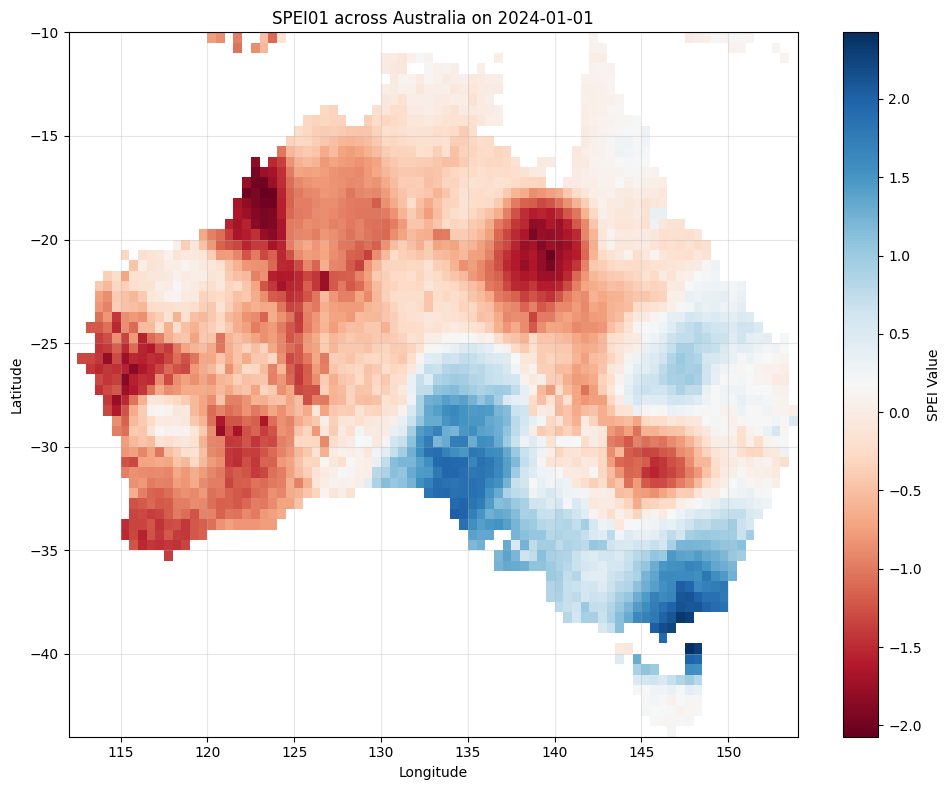

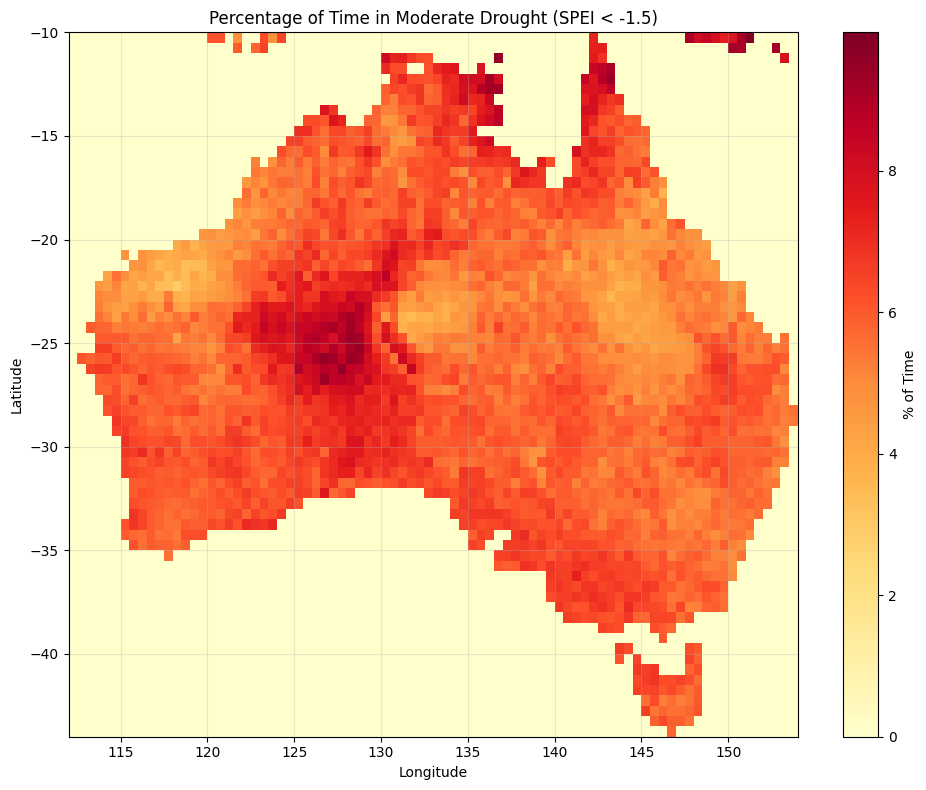

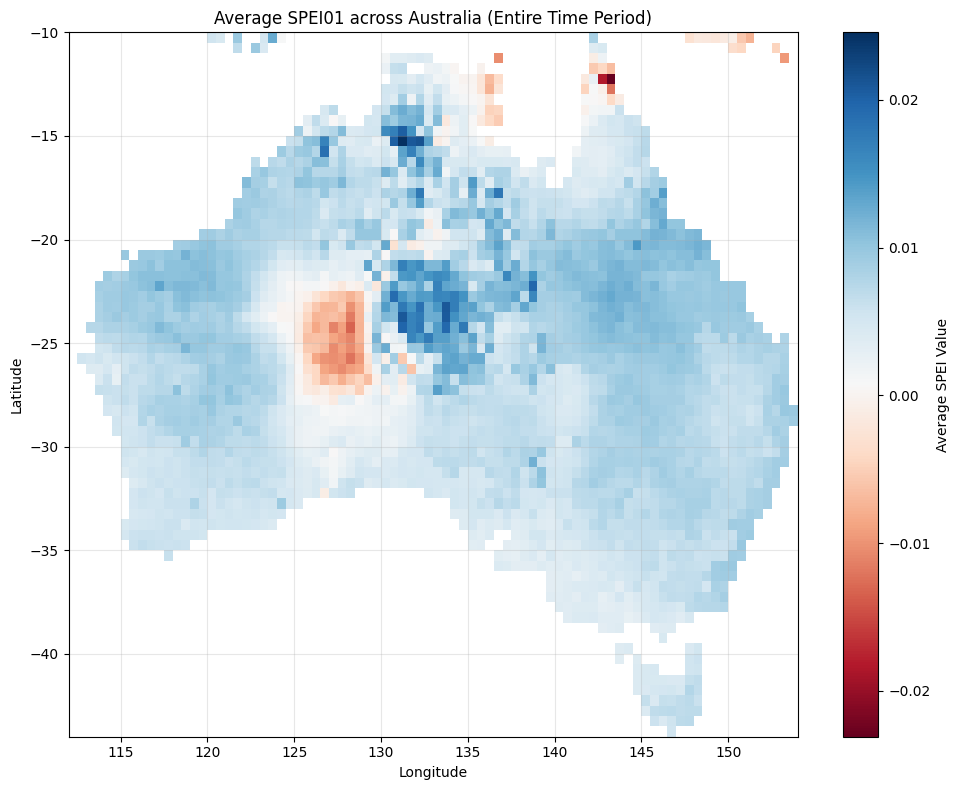

In [8]:
# Assuming the file is already downloaded
file_path = './spei01.nc'

# Open the dataset with proper time decoding
ds = xr.open_dataset(file_path)

# Define the Australia bounding box [north, west, south, east]
australia_bounds = [-10.0, 112.0, -44.0, 154.0]
north_lat, west_lon, south_lat, east_lon = australia_bounds

# Extract the subset for Australia
australia_data = ds.spei.sel(
    lat=slice(australia_bounds[2], australia_bounds[0]),
    lon=slice(australia_bounds[1], australia_bounds[3])
)

# Check if we actually got data for Australia
print(f"Data shape: {australia_data.shape}")
print(f"Latitudes: {australia_data.lat.values}")
print(f"Longitudes: {australia_data.lon.values}")

# Calculate regional average for all of Australia over time
australia_avg = australia_data.mean(dim=['lat', 'lon'], skipna=True)

# Convert to pandas for easier handling of dates
# First get the time values in days since the reference date
time_values = ds.time.values
time_units = ds.time.attrs.get('units', 'days since 1900-01-01')
print(f"Time units: {time_units}")

# Convert to pandas datetime
dates_pd = pd.date_range(start='1900-01-01', periods=len(time_values), freq='MS')
if len(dates_pd) == len(time_values):
    # Adjust if needed based on the actual dates
    # For monthly data starting Jan 1901, we'd use:
    dates_pd = pd.date_range(start='1901-01-16', periods=len(time_values), freq='MS')

# Create a pandas DataFrame for the time series of area average
df_avg = pd.DataFrame({
    'date': dates_pd,
    'spei_avg': australia_avg.values
})

# Print information
print(f"Australia SPEI Analysis ({australia_bounds})")
print(f"Time period: {df_avg['date'].min()} to {df_avg['date'].max()}")
print(f"Number of time steps: {len(df_avg)}")
print(f"Spatial resolution: {len(australia_data.lat)} x {len(australia_data.lon)} grid points")

# 1. Plot the time series of area-averaged SPEI
plt.figure(figsize=(12, 6))
plt.plot(df_avg['date'], df_avg['spei_avg'])
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.fill_between(df_avg['date'], df_avg['spei_avg'], 0, where=df_avg['spei_avg'] < 0, color='r', alpha=0.3, label='Drought')
plt.fill_between(df_avg['date'], df_avg['spei_avg'], 0, where=df_avg['spei_avg'] > 0, color='b', alpha=0.3, label='Wet')
plt.grid(True, alpha=0.3)
plt.title('Average SPEI01 Time Series for Australia')
plt.xlabel('Date')
plt.ylabel('SPEI Value')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Plot a spatial map for a specific time point (e.g., most recent available)
# Get the most recent time step
recent_idx = -1  # Most recent time step
recent_data = australia_data.isel(time=recent_idx)
recent_date = dates_pd[recent_idx]

plt.figure(figsize=(10, 8))
plt.title(f'SPEI01 across Australia on {recent_date.strftime("%Y-%m-%d")}')

# Create a custom colormap with blue for wet, white for neutral, and red for drought
cmap = plt.cm.RdBu

# Plot the data
map_plot = plt.pcolormesh(recent_data.lon, recent_data.lat, recent_data, cmap=cmap)
plt.colorbar(map_plot, label='SPEI Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Calculate drought frequency (percentage of time in drought conditions)
drought_freq = (australia_data < -1.5).mean(dim='time', skipna=True) * 100

plt.figure(figsize=(10, 8))
plt.title('Percentage of Time in Moderate Drought (SPEI < -1.5)')
drought_map = plt.pcolormesh(drought_freq.lon, drought_freq.lat, drought_freq, cmap='YlOrRd')
plt.colorbar(drought_map, label='% of Time')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Plot the average SPEI value over time for each grid cell
avg_spei_map = australia_data.mean(dim='time', skipna=True)

plt.figure(figsize=(10, 8))
plt.title('Average SPEI01 across Australia (Entire Time Period)')

# Use the same colormap as before
cmap = plt.cm.RdBu

# Plot the data
avg_plot = plt.pcolormesh(avg_spei_map.lon, avg_spei_map.lat, avg_spei_map, cmap=cmap)
plt.colorbar(avg_plot, label='Average SPEI Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


The following example demonstrates how to retrieve the SPEI value for a specific date and location (e.g., near Sydney) from the dataset.


In [ ]:
# Choose a date
selected_date = np.datetime64("2005-01-01")

# Choose lat/lon near a known location (e.g., Sydney)
selected_lat = -33.0
selected_lon = 151.0

# Select the value using .sel
value = australia_data.sel(time=selected_date, lat=selected_lat, lon=selected_lon, method="nearest")

print(f"SPEI at lat={selected_lat}, lon={selected_lon}, time={selected_date} is {value.values:.3f}")


SPEI at lat=-33.0, lon=151.0, time=2005-01-01 is -0.146
